In [1]:
import matplotlib.pyplot as plt # for plotting maps
import pandas as pd # standard python data library
import geopandas as gp # the geo-version of pandas
import numpy as np 
from statistics import mean, median
from functools import reduce
import matplotlib.pyplot as plt

# Election Results

## Load Election Results

This data file reports elections from 2016 on a map of TX's 2016 VTDs. The TX Capitol Data Portal Website has this data online already.  

Election results and turnout data are stored in separate files. 

In [2]:
returns_2016 = pd.read_csv('./raw-from-source/ftp_election_data_16g/2016_General_Election_Returns.csv')

In [3]:
returns_2016.head()

,County,FIPS,VTD,cntyvtd,Office,Name,Party,Incumbent,Votes
0,Anderson,1,0001,10001,President,Clinton,D,N,262
1,Anderson,1,0002,10002,President,Clinton,D,N,181
2,Anderson,1,0003,10003,President,Clinton,D,N,94
3,Anderson,1,0004,10004,President,Clinton,D,N,96
4,Anderson,1,0005,10005,President,Clinton,D,N,9


The returns will need to be pivoted. 

In [4]:
returns_2016['Office'].unique()

array(['President', 'U.S. Rep 5', 'RR Comm 1', 'Sup Ct 3', 'Sup Ct 5',
       'Sup Ct 9', 'CCA 2', 'CCA 5', 'CCA 6', 'SBOE 9', 'U.S. Rep 11',
       'U.S. Rep 1', 'U.S. Rep 27', 'State Sen 18', 'U.S. Rep 13',
       'U.S. Rep 28', 'SBOE 1', 'State Sen 19', 'U.S. Rep 10', 'SBOE 10',
       'State Rep 13', 'U.S. Rep 19', 'U.S. Rep 21', 'State Sen 24',
       'State Rep 53', 'U.S. Rep 17', 'U.S. Rep 34', 'State Rep 43',
       'U.S. Rep 31', 'U.S. Rep 25', 'State Rep 54', 'U.S. Rep 35',
       'U.S. Rep 23', 'U.S. Rep 20', 'SBOE 5', 'State Sen 26',
       'State Rep 118', 'State Rep 117', 'State Rep 120', 'State Sen 22',
       'U.S. Rep 4', 'U.S. Rep 14', 'U.S. Rep 22', 'State Rep 29',
       'U.S. Rep 15', 'State Sen 20', 'U.S. Rep 36', 'State Sen 4',
       'State Rep 23', 'State Rep 11', 'U.S. Rep 3', 'U.S. Rep 32',
       'State Rep 70', 'State Rep 67', 'State Rep 89', 'State Rep 33',
       'State Rep 66', 'U.S. Rep 30', 'U.S. Rep 24', 'U.S. Rep 26',
       'U.S. Rep 33', 'State Rep

In [5]:
returns_2016['Party'].unique()

array(['D', 'R', 'L', 'G', 'W', 'I'], dtype=object)

## Pivot Election Results

We want to modify the election data so that each row reports the results for the various races for each VTD. 

In [6]:
office_list_2016 = ["President","RR Comm 1"]
party_list = ["R","D","L","G","W"]
returns_2016_filtered = returns_2016[returns_2016['Office'].isin(office_list_2016)]
returns_2016_filtered = returns_2016_filtered[returns_2016_filtered['Party'].isin(party_list)]
pivoted_2016 = pd.pivot_table(returns_2016_filtered, values=['Votes'], index=["cntyvtd"],columns=["Office","Party"])

In [7]:
pivoted_2016.head()

Votes                                        
Office  President                 RR Comm 1              
Party           D  G   L     R  W         D   G   L     R
cntyvtd                                                  
10001         262  5  18   742  3       236  22  47   710
10002         181  5  22  1318  6       202  16  64  1200
10003          94  2  16   663  1        97   7  27   622
10004          96  2  17   869  1       112   9  31   804
10005           9  0   2   180  0        11   1   8   160

Rename columns to match VEST column names

In [8]:
pivoted_2016.columns = ["G16PREDCli","G16PREGSte","G16PRELJoh","G16PRERTru","G16PREOth",
                        "G16RRCDYar","G16RRCGSal","G16RRCLMil","G16RRCRChr"]
pivoted_2016.index.names = ["CNTYVTD"]

In [9]:
pivoted_2016.head()

,G16PREDCli,G16PREGSte,G16PRELJoh,G16PRERTru,G16PREOth,G16RRCDYar,G16RRCGSal,G16RRCLMil,G16RRCRChr
CNTYVTD,,,,,,,,,
10001,262,5,18,742,3,236,22,47,710
10002,181,5,22,1318,6,202,16,64,1200
10003,94,2,16,663,1,97,7,27,622
10004,96,2,17,869,1,112,9,31,804
10005,9,0,2,180,0,11,1,8,160


In [10]:
pivoted_2016.sum()

G16PREDCli    3877626
G16PREGSte      71546
G16PRELJoh     283462
G16PRERTru    4684288
G16PREOth       64938
G16RRCDYar    3361857
G16RRCGSal     286066
G16RRCLMil     462163
G16RRCRChr    4648357
dtype: int64

These sums look right against official totals. 

In [11]:
pivoted_2016.shape

(8941, 9)

# VTD Shapefile

## Load TX Raw Shapefile

2016 General Election VTD Shapefile is used for these results

In [12]:
vtd_2016 = gp.read_file('./raw-from-source/vtd16g/vtd16g.shp')

In [13]:
vtd_2016.head()

,CNTY,COLOR,VTD,CNTYVTD,VTDKEY,Shape_area,Shape_len,geometry
0,53,2,0008,530008,0,6.717692e+07,55772.006345,"POLYGON ((1159123.585 956882.966, 1159183.604 ..."
1,469,2,0024,4690024,0,5.426296e+07,50831.107001,"POLYGON ((1292779.280 755618.564, 1292761.756 ..."
2,421,6,0302,4210302,0,4.890835e+08,115435.448089,"POLYGON ((835910.171 1592476.454, 835993.315 1..."
3,479,1,0340,4790340,0,1.949293e+06,5991.528062,"POLYGON ((1052058.489 602069.618, 1052032.480 ..."
4,29,5,4046,294046,0,2.356032e+06,6851.937823,"POLYGON ((1151858.098 818462.053, 1151860.759 ..."


In [14]:
vtd_2016.shape

(8941, 8)

In [15]:
vtd_2016.crs

<Projected CRS: EPSG:3081>
Name: NAD83 / Texas State Mapping System
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: USA - Texas
- bounds: (-106.66, 25.83, -93.5, 36.5)
Coordinate Operation:
- name: Texas State Mapping System (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

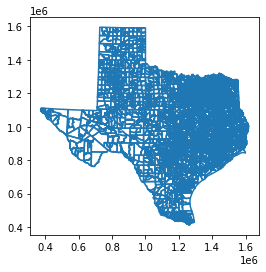

In [16]:
vtd_2016.boundary.plot()

## Load VEST Final Shapefile

In [17]:
tx_vest = gp.read_file('./raw-from-source/tx_2016/tx_2016.shp')

In [18]:
tx_vest.head()

,CNTY,PREC,PCTKEY,cntykey,G16PREDCli,G16PRERTru,G16PRELJoh,G16PREGSte,G16PREOth,G16RRCDYar,G16RRCRChr,G16RRCLMil,G16RRCGSal,geometry
0,439,1611,4391611,220,8,4,1,0,0,7,4,2,0,"POLYGON ((1249580.405 1174145.301, 1249495.984..."
1,27,0311,270311,14,269,1406,46,10,13,237,1355,80,26,"POLYGON ((1248151.416 1010828.003, 1248115.887..."
2,35,0001,350001,18,61,401,6,2,2,63,370,25,3,"POLYGON ((1203351.469 1102126.682, 1203420.185..."
3,201,0736,2010736,101,16,1,0,0,0,13,1,0,1,"POLYGON ((1448608.994 856538.940, 1448597.676 ..."
4,439,3039,4393039,220,782,1780,99,11,25,575,1944,136,42,"POLYGON ((1268323.146 1205017.455, 1268329.146..."


In [19]:
tx_vest.shape

(8832, 14)

In [20]:
tx_vest.crs

<Projected CRS: EPSG:3081>
Name: NAD83 / Texas State Mapping System
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: USA - Texas
- bounds: (-106.66, 25.83, -93.5, 36.5)
Coordinate Operation:
- name: Texas State Mapping System (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

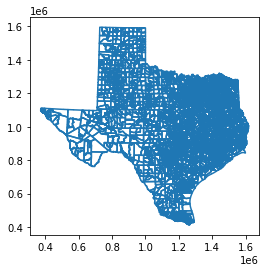

In [21]:
tx_vest.boundary.plot()

# Joining

## Join Election Results to VTD File

In [22]:
pivoted_2016.head(1)

,G16PREDCli,G16PREGSte,G16PRELJoh,G16PRERTru,G16PREOth,G16RRCDYar,G16RRCGSal,G16RRCLMil,G16RRCRChr
CNTYVTD,,,,,,,,,
10001,262,5,18,742,3,236,22,47,710


In [23]:
tx_rdh = pivoted_2016.merge(vtd_2016, how = 'left', on = 'CNTYVTD', indicator = True)

In [24]:
tx_rdh.groupby('_merge').count()

,CNTYVTD,G16PREDCli,G16PREGSte,G16PRELJoh,G16PRERTru,G16PREOth,G16RRCDYar,G16RRCGSal,G16RRCLMil,G16RRCRChr,CNTY,COLOR,VTD,VTDKEY,Shape_area,Shape_len,geometry
_merge,,,,,,,,,,,,,,,,,
left_only,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
both,8941,8941,8941,8941,8941,8941,8941,8941,8941,8941,8941,8941,8941,8941,8941,8941,8941


So the TX election results and VTD files merged no problem

In [25]:
tx_rdh.head(1)

,CNTYVTD,G16PREDCli,G16PREGSte,G16PRELJoh,G16PRERTru,G16PREOth,G16RRCDYar,G16RRCGSal,G16RRCLMil,G16RRCRChr,CNTY,COLOR,VTD,VTDKEY,Shape_area,Shape_len,geometry,_merge
0,10001,262,5,18,742,3,236,22,47,710,1,4,0001,0,5.616316e+06,15020.544928,"POLYGON ((1413960.808 1073012.816, 1413971.571...",both


In [26]:
tx_rdh.drop(columns=['_merge'], inplace = True)

## Join RDH File to VEST File

### Join Attempt #1

In [27]:
tx_vest.head(1)

,CNTY,PREC,PCTKEY,cntykey,G16PREDCli,G16PRERTru,G16PRELJoh,G16PREGSte,G16PREOth,G16RRCDYar,G16RRCRChr,G16RRCLMil,G16RRCGSal,geometry
0,439,1611,4391611,220,8,4,1,0,0,7,4,2,0,"POLYGON ((1249580.405 1174145.301, 1249495.984..."


In [28]:
overlap = tx_rdh.merge(tx_vest, how = 'outer', left_on = 'CNTYVTD', right_on = 'PCTKEY', indicator = True)

In [29]:
overlap.groupby('_merge').count()

,CNTYVTD,G16PREDCli_x,G16PREGSte_x,G16PRELJoh_x,G16PRERTru_x,G16PREOth_x,G16RRCDYar_x,G16RRCGSal_x,G16RRCLMil_x,G16RRCRChr_x,...,G16PREDCli_y,G16PRERTru_y,G16PRELJoh_y,G16PREGSte_y,G16PREOth_y,G16RRCDYar_y,G16RRCRChr_y,G16RRCLMil_y,G16RRCGSal_y,geometry_y
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,222,222,222,222,222,222,222,222,222,222,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
both,8719,8719,8719,8719,8719,8719,8719,8719,8719,8719,...,8719,8719,8719,8719,8719,8719,8719,8719,8719,8719


Look at the precincts that didn't join

In [30]:
# with pd.option_context('display.max_rows', 500):
#     print(overlap.loc[overlap['_merge'] == 'left_only'][['CNTYVTD','G16PREDCli_x']].sort_values(by='CNTYVTD'))
overlap.loc[overlap['_merge'] == 'left_only'][['CNTYVTD','G16PREDCli_x']].sort_values(by='CNTYVTD')

,CNTYVTD,G16PREDCli_x
121,1131065A,1031.0
122,1131065B,0.0
123,1131065C,0.0
128,1131071A,1195.0
129,1131071B,0.0
...,...,...
8799,850197B,0.0
8851,910105A,640.0
8852,910105B,13.0
8856,910203A,811.0


In [31]:
overlap.loc[overlap['_merge'] == 'right_only'][['PCTKEY','G16PREDCli_y']].sort_values(by='PCTKEY')

,PCTKEY,G16PREDCli_y
8945,1131065,1031.0
8947,1131071,1195.0
8985,1131075,783.0
8949,1131087,1517.0
8964,1131141,0.0
...,...,...
8997,850108,969.0
8942,850126,1108.0
8972,850197,418.0
8999,910105,653.0


Interesting, so VEST cleaned up the A,B,C precincts that didn't have election results... did they merge those geographies? 

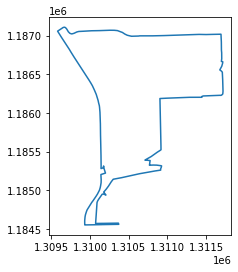

In [32]:
vtd_2016.loc[(vtd_2016['CNTYVTD'].str.contains('1131065A'))].boundary.plot()

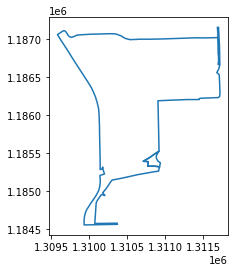

In [33]:
vtd_2016.loc[(vtd_2016['CNTYVTD'].str.contains('1131065'))].boundary.plot()

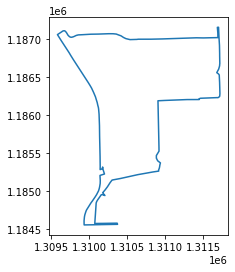

In [34]:
tx_vest.loc[tx_vest.PCTKEY == '1131065'].boundary.plot()

Based on this spot check, it does look like they merged those geographies. We will try to replicate this but we don't know why they did it

In [35]:
tx_rdh[tx_rdh.CNTYVTD.isin(overlap.loc[overlap['_merge'] == 'left_only']['CNTYVTD'])].head(3)

,CNTYVTD,G16PREDCli,G16PREGSte,G16PRELJoh,G16PRERTru,G16PREOth,G16RRCDYar,G16RRCGSal,G16RRCLMil,G16RRCRChr,CNTY,COLOR,VTD,VTDKEY,Shape_area,Shape_len,geometry
121,1131065A,1031,7,31,211,0,949,46,58,204,113,5,1065A,0,2.351253e+06,10007.470945,"POLYGON ((1309750.052 1187025.572, 1309760.794..."
122,1131065B,0,0,0,0,0,0,0,0,0,113,7,1065B,0,2.067407e+04,773.443143,"POLYGON ((1310929.863 1185341.460, 1310925.792..."
123,1131065C,0,0,0,0,0,0,0,0,0,113,6,1065C,0,7.330316e+03,1015.113743,"POLYGON ((1311719.063 1186676.498, 1311717.228..."


In [36]:
tx_rdh[tx_rdh.CNTYVTD.isin(overlap.loc[overlap['_merge'] == 'left_only']['CNTYVTD'])].shape

(222, 17)

In [37]:
tx_rdh_v2 = tx_rdh.copy()

In [38]:
tx_rdh = tx_rdh_v2.copy()

In [39]:
tx_rdh.columns

Index(['CNTYVTD', 'G16PREDCli', 'G16PREGSte', 'G16PRELJoh', 'G16PRERTru',
       'G16PREOth', 'G16RRCDYar', 'G16RRCGSal', 'G16RRCLMil', 'G16RRCRChr',
       'CNTY', 'COLOR', 'VTD', 'VTDKEY', 'Shape_area', 'Shape_len',
       'geometry'],
      dtype='object')

Merge election results columns

In [40]:
pivoted_2016.reset_index(inplace = True)

In [41]:
pivoted_2016[(pivoted_2016.CNTYVTD.isin(overlap.loc[overlap['_merge'] == 'left_only']['CNTYVTD'])) & (pivoted_2016.CNTYVTD.str.startswith('2010143'))]

,CNTYVTD,G16PREDCli,G16PREGSte,G16PRELJoh,G16PRERTru,G16PREOth,G16RRCDYar,G16RRCGSal,G16RRCLMil,G16RRCRChr
2254,2010143A,0,0,0,0,0,0,0,0,0
2255,2010143B,151,0,11,241,2,127,4,21,251
2256,2010143C,636,4,50,1009,9,532,17,91,1054


In [42]:
temp_list = pivoted_2016[(pivoted_2016.CNTYVTD.isin(overlap.loc[overlap['_merge'] == 'left_only']['CNTYVTD'])) & (pivoted_2016.CNTYVTD.str.startswith('2010143'))].sum(numeric_only = True).to_list()
temp_list

[787, 4, 61, 1250, 11, 659, 21, 112, 1305]

In [43]:
pivoted_2016.columns

Index(['CNTYVTD', 'G16PREDCli', 'G16PREGSte', 'G16PRELJoh', 'G16PRERTru',
       'G16PREOth', 'G16RRCDYar', 'G16RRCGSal', 'G16RRCLMil', 'G16RRCRChr'],
      dtype='object')

In [44]:
temp = pd.DataFrame([temp_list], columns = ['G16PREDCli', 'G16PREGSte', 'G16PRELJoh', 'G16PRERTru',
       'G16PREOth', 'G16RRCDYar', 'G16RRCGSal', 'G16RRCLMil', 'G16RRCRChr'])
temp

,G16PREDCli,G16PREGSte,G16PRELJoh,G16PRERTru,G16PREOth,G16RRCDYar,G16RRCGSal,G16RRCLMil,G16RRCRChr
0,787,4,61,1250,11,659,21,112,1305


The following code goes through the precincts that did not join, and merges the geographies and aggregates the election results. The code is ugly because there's no universal solution, because some precincts have A,B,C,D,E,F that need to be merged.

At the end, this code prints out the county/precinct pairs that were merged. 

In [45]:
tx_rdh.sum()

CNTYVTD       1000110002100031000410005100061000710008100091...
G16PREDCli                                              3877626
G16PREGSte                                                71546
G16PRELJoh                                               283462
G16PRERTru                                              4684288
G16PREOth                                                 64938
G16RRCDYar                                              3361857
G16RRCGSal                                               286066
G16RRCLMil                                               462163
G16RRCRChr                                              4648357
CNTY                                                    2039513
COLOR                                                     35546
VTD           0001000200030004000500060007000800090010001100...
VTDKEY                                                        0
Shape_area                                          6.93736e+11
Shape_len                               

In [46]:
count = 0 
rdh_vtd_dissolved = []
temp_df = gp.GeoDataFrame()
for index, row in tx_rdh[tx_rdh.CNTYVTD.isin(overlap.loc[overlap['_merge'] == 'left_only']['CNTYVTD'])].iterrows():
#     print(row['CNTYVTD'])
    unique_id = row['CNTYVTD'].replace('A','').replace('B','').replace('C','').replace('D','').replace('E','').replace('F','')
    rdh_vtd_dissolved.append((row['CNTY'], unique_id))    
    
    if count == 0: 
        group_unique_id = unique_id
    else: 
        if unique_id != group_unique_id: 
            temp_dissolved = temp_df.dissolve(by='CNTY')
            temp_dissolved.reset_index(inplace = True)
            temp_dissolved['CNTYVTD'] = temp_dissolved['CNTYVTD'].str.replace('A','')
            
            # merge election results
            temp_list = pivoted_2016[(pivoted_2016.CNTYVTD.isin(overlap.loc[overlap['_merge'] == 'left_only']['CNTYVTD'])) & (pivoted_2016.CNTYVTD.str.startswith(group_unique_id))].sum(numeric_only = True).to_list()
            temp_election_results = pd.DataFrame([temp_list], columns = ['G16PREDCli', 'G16PREGSte', 'G16PRELJoh', 'G16PRERTru',
                       'G16PREOth', 'G16RRCDYar', 'G16RRCGSal', 'G16RRCLMil', 'G16RRCRChr'])

            temp_dissolved[['G16PREDCli', 'G16PREGSte', 'G16PRELJoh', 'G16PRERTru',
                            'G16PREOth', 'G16RRCDYar', 'G16RRCGSal', 'G16RRCLMil', 
                            'G16RRCRChr']] = temp_election_results[['G16PREDCli', 'G16PREGSte', 'G16PRELJoh', 'G16PRERTru',
                                                                    'G16PREOth', 'G16RRCDYar', 'G16RRCGSal', 'G16RRCLMil', 
                                                                    'G16RRCRChr']]
            
            tx_rdh = tx_rdh.append(temp_dissolved)
            
            temp_df = gp.GeoDataFrame()
            group_unique_id = unique_id
    
    temp_df = temp_df.append(row)
    tx_rdh.drop([index],inplace = True)

    count += 1
    

In [48]:
# do the last one out of the loop
temp_dissolved = temp_df.dissolve(by='CNTY')
temp_dissolved.reset_index(inplace = True)
temp_dissolved['CNTYVTD'] = temp_dissolved['CNTYVTD'].str.replace('A','')
temp_list = pivoted_2016[(pivoted_2016.CNTYVTD.isin(overlap.loc[overlap['_merge'] == 'left_only']['CNTYVTD'])) & (pivoted_2016.CNTYVTD.str.contains(group_unique_id))].sum(numeric_only = True).to_list()
temp_list

[811, 20, 116, 3174, 16, 622, 55, 210, 3158]

In [49]:
temp_election_results = pd.DataFrame([temp_list], columns = ['G16PREDCli', 'G16PREGSte', 'G16PRELJoh', 'G16PRERTru',
           'G16PREOth', 'G16RRCDYar', 'G16RRCGSal', 'G16RRCLMil', 'G16RRCRChr'])
temp_dissolved[['G16PREDCli', 'G16PREGSte', 'G16PRELJoh', 'G16PRERTru',
                'G16PREOth', 'G16RRCDYar', 'G16RRCGSal', 'G16RRCLMil', 
                'G16RRCRChr']] = temp_election_results[['G16PREDCli', 'G16PREGSte', 'G16PRELJoh', 'G16PRERTru',
                                                        'G16PREOth', 'G16RRCDYar', 'G16RRCGSal', 'G16RRCLMil', 
                                                        'G16RRCRChr']]
tx_rdh = tx_rdh.append(temp_dissolved)
# tx_rdh.drop([index],inplace = True)

print('Precincts in the RDH file that were dissolved: ', set(rdh_vtd_dissolved))

Precincts in the RDH file that were dissolved:  {(215, '2150177'), (29, '293096'), (307, '3070201'), (113, '1131065'), (209, '2090441'), (113, '1131087'), (491, '4910333'), (487, '4870001'), (201, '2010143'), (113, '1131075'), (339, '3390089'), (201, '2010794'), (113, '1133940'), (113, '1134003'), (113, '1133016'), (215, '2150198'), (339, '3390030'), (17, '170004'), (201, '2010862'), (27, '270404'), (187, '1870102'), (431, '4310001'), (5, '50008'), (485, '4850114'), (113, '1133008'), (201, '2010731'), (351, '3510008'), (259, '2592120'), (481, '4810101'), (215, '2150194'), (201, '2010950'), (305, '3050001'), (113, '1134091'), (465, '4650010'), (443, '4430002'), (329, '3290101'), (167, '1670316'), (85, '850126'), (113, '1134006'), (113, '1134087'), (201, '2010083'), (201, '2010001'), (269, '2690003'), (401, '4010314'), (113, '1132028'), (215, '2150245'), (473, '4730420'), (91, '910105'), (113, '1134097'), (113, '1134608'), (163, '1630004'), (323, '323002'), (215, '2150097'), (85, '850108

Check that the example case that we were testing out above looks good

In [50]:
pivoted_2016[(pivoted_2016.CNTYVTD.str.contains('2010143'))]

,CNTYVTD,G16PREDCli,G16PREGSte,G16PRELJoh,G16PRERTru,G16PREOth,G16RRCDYar,G16RRCGSal,G16RRCLMil,G16RRCRChr
2254,2010143A,0,0,0,0,0,0,0,0,0
2255,2010143B,151,0,11,241,2,127,4,21,251
2256,2010143C,636,4,50,1009,9,532,17,91,1054


In [51]:
tx_rdh[(tx_rdh.CNTYVTD.str.contains('2010143'))]

,CNTYVTD,G16PREDCli,G16PREGSte,G16PRELJoh,G16PRERTru,G16PREOth,G16RRCDYar,G16RRCGSal,G16RRCLMil,G16RRCRChr,CNTY,COLOR,VTD,VTDKEY,Shape_area,Shape_len,geometry
0,2010143,787,4,61,1250,11,659,21,112,1305,201.0,5.0,0143A,0.0,284400.436993,4492.929626,"MULTIPOLYGON (((1414232.005 869212.298, 141424..."


Check the election result totals are still good: 

In [52]:
tx_rdh.sum()

CNTYVTD       1000110002100031000410005100061000710008100091...
G16PREDCli                                              3877626
G16PREGSte                                                71546
G16PRELJoh                                               283462
G16PRERTru                                              4684288
G16PREOth                                                 64938
G16RRCDYar                                              3361857
G16RRCGSal                                               286066
G16RRCLMil                                               462163
G16RRCRChr                                              4648357
CNTY                                                2.01197e+06
COLOR                                                     35073
VTD           0001000200030004000500060007000800090010001100...
VTDKEY                                                        0
Shape_area                                          6.90346e+11
Shape_len                               

### Join Attempt #2

Now that we've performed these merges, attempt another join between the RDH file and the VEST file

In [53]:
tx_rdh.shape

(8819, 17)

In [54]:
tx_vest.shape

(8832, 14)

In [55]:
overlap = tx_rdh.merge(tx_vest, how = 'outer', left_on = 'CNTYVTD', right_on = 'PCTKEY', indicator = True)

In [57]:
overlap.groupby('_merge').count()

,CNTYVTD,G16PREDCli_x,G16PREGSte_x,G16PRELJoh_x,G16PRERTru_x,G16PREOth_x,G16RRCDYar_x,G16RRCGSal_x,G16RRCLMil_x,G16RRCRChr_x,...,G16PREDCli_y,G16PRERTru_y,G16PRELJoh_y,G16PREGSte_y,G16PREOth_y,G16RRCDYar_y,G16RRCRChr_y,G16RRCLMil_y,G16RRCGSal_y,geometry_y
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
both,8819,8819,8819,8819,8819,8819,8819,8819,8819,8819,...,8819,8819,8819,8819,8819,8819,8819,8819,8819,8819


In [58]:
overlap.columns

Index(['CNTYVTD', 'G16PREDCli_x', 'G16PREGSte_x', 'G16PRELJoh_x',
       'G16PRERTru_x', 'G16PREOth_x', 'G16RRCDYar_x', 'G16RRCGSal_x',
       'G16RRCLMil_x', 'G16RRCRChr_x', 'CNTY_x', 'COLOR', 'VTD', 'VTDKEY',
       'Shape_area', 'Shape_len', 'geometry_x', 'CNTY_y', 'PREC', 'PCTKEY',
       'cntykey', 'G16PREDCli_y', 'G16PRERTru_y', 'G16PRELJoh_y',
       'G16PREGSte_y', 'G16PREOth_y', 'G16RRCDYar_y', 'G16RRCRChr_y',
       'G16RRCLMil_y', 'G16RRCGSal_y', 'geometry_y', '_merge'],
      dtype='object')

In [92]:
overlap.loc[overlap['_merge'] == 'right_only'][['CNTY_y','PCTKEY','G16PREDCli_y', 'G16PRERTru_y', 'G16PRELJoh_y',
       'G16PREGSte_y', 'G16PREOth_y', 'G16RRCDYar_y', 'G16RRCRChr_y',
       'G16RRCLMil_y', 'G16RRCGSal_y','geometry_y']].sort_values(by=['CNTY_y','PCTKEY'])

,CNTY_y,PCTKEY,G16PREDCli_y,G16PRERTru_y,G16PRELJoh_y,G16PREGSte_y,G16PREOth_y,G16RRCDYar_y,G16RRCRChr_y,G16RRCLMil_y,G16RRCGSal_y,geometry_y
8819,29,293177,0,0,0,0,0,0,0,0,0,"POLYGON ((1151960.831 814994.220, 1151951.770 ..."
8829,29,294197,0,0,0,0,0,0,0,0,0,"POLYGON ((1163441.640 816223.596, 1163492.208 ..."
8828,41,410050,0,0,0,0,0,0,0,0,0,"POLYGON ((1354054.995 937536.488, 1354054.461 ..."
8827,41,410051,0,0,0,0,0,0,0,0,0,"POLYGON ((1354320.301 936772.624, 1354109.691 ..."
8830,55,550411,0,0,0,0,0,0,0,0,0,"POLYGON ((1226224.579 859292.557, 1226217.539 ..."
8831,121,1212098,0,0,0,0,0,0,0,0,0,"POLYGON ((1291224.354 1214891.830, 1291111.976..."
8820,303,3030143,0,0,0,0,0,0,0,0,0,"POLYGON ((811737.174 1269530.503, 811761.096 1..."
8823,303,3030144,0,0,0,0,0,0,0,0,0,"POLYGON ((811935.851 1266991.698, 811930.304 1..."
8826,303,3030145,0,0,0,0,0,0,0,0,0,"POLYGON ((816674.548 1266826.587, 816673.669 1..."
8824,303,3030146,0,0,0,0,0,0,0,0,0,"POLYGON ((815357.959 1270403.328, 816252.675 1..."


Look at these in the RDH file

In [60]:
# tx_rdh[tx_rdh.CNTYVTD.isin(overlap.loc[overlap['_merge'] == 'right_only']['PCTKEY'])]
for index, row in overlap.loc[overlap['_merge'] == 'right_only'][['CNTY_y','PCTKEY','G16PREDCli_y']].iterrows(): 
    if row['PCTKEY'] in rdh_vtd_dissolved: 
        print(row['PCTKEY'])

So none of these are in the RDH dissolved precincts and they also don't have election results. Not sure where they are coming from, it seems like VEST may have a slightly different shapefile

In [61]:
vtd_2016.loc[vtd_2016.CNTY.isin([29,41,55,121,303])]['CNTY'].value_counts()

29     713
121    159
303    101
41      75
55      40
Name: CNTY, dtype: int64

In [62]:
tx_rdh.loc[tx_rdh.CNTY.isin([29,41,55,121,303])]['CNTY'].value_counts()

29.0     710
121.0    157
303.0    101
41.0      75
55.0      40
Name: CNTY, dtype: int64

In [63]:
tx_vest.loc[tx_vest.CNTY.isin([29,41,55,121,303])]['CNTY'].value_counts()

29     712
121    158
303    108
41      77
55      41
Name: CNTY, dtype: int64

We don't expect these numbers to totally show the differences because we dissolved things... 
- CNTY 303 is an example where we did not have any precincts dissolved and there are 7 more precincts in the VEST file than the RDH file

# Validation

## Election Results

### Column by column totals

In [64]:
def sum_checker (df, column_List):
    """Checks the sums of different columns and prints out the maximum difference by column. 
    Assumes that the dataframe is the merged dataframe between RDH and the partner, with the same named election result
    columns, except RDH is _x and Partner is _y. 
    """
    list_max = 0
    for i in column_List:
        left_sum = df[i+"_x"].sum()
        right_sum = df[i+"_y"].sum()
        if (left_sum==right_sum):
            print("Column: ", i, " have the same sums")
            
        else:
            diff = abs(left_sum-right_sum)
            percent = abs(left_sum-right_sum)/left_sum
            print("Column: ", i)
            print("RDH sum is ", str(left_sum))
            print("Partner sum is ", str(right_sum))
            print("Their (absolute) difference is ",str(diff))
            print("As a percentage of DF1 this is ", str(round(percent*100,5)) + "%")
            if (percent>list_max):
                list_max = percent
            print("")
    print("The max difference (as a percent of the total of one DF column) is: ", str(round(list_max,5)))

Pass the list of election result columns: 

In [65]:
overlap.columns

Index(['CNTYVTD', 'G16PREDCli_x', 'G16PREGSte_x', 'G16PRELJoh_x',
       'G16PRERTru_x', 'G16PREOth_x', 'G16RRCDYar_x', 'G16RRCGSal_x',
       'G16RRCLMil_x', 'G16RRCRChr_x', 'CNTY_x', 'COLOR', 'VTD', 'VTDKEY',
       'Shape_area', 'Shape_len', 'geometry_x', 'CNTY_y', 'PREC', 'PCTKEY',
       'cntykey', 'G16PREDCli_y', 'G16PRERTru_y', 'G16PRELJoh_y',
       'G16PREGSte_y', 'G16PREOth_y', 'G16RRCDYar_y', 'G16RRCRChr_y',
       'G16RRCLMil_y', 'G16RRCGSal_y', 'geometry_y', '_merge'],
      dtype='object')

In [66]:
election_columns = [key[:-2] for key in overlap.keys() if '16' in key and (key.endswith("_x") or key.endswith("_y"))]
sum_checker(overlap, election_columns)

Column:  G16PREDCli  have the same sums
Column:  G16PREGSte  have the same sums
Column:  G16PRELJoh  have the same sums
Column:  G16PRERTru  have the same sums
Column:  G16PREOth  have the same sums
Column:  G16RRCDYar  have the same sums
Column:  G16RRCGSal  have the same sums
Column:  G16RRCLMil  have the same sums
Column:  G16RRCRChr  have the same sums
Column:  G16PREDCli  have the same sums
Column:  G16PRERTru  have the same sums
Column:  G16PRELJoh  have the same sums
Column:  G16PREGSte  have the same sums
Column:  G16PREOth  have the same sums
Column:  G16RRCDYar  have the same sums
Column:  G16RRCRChr  have the same sums
Column:  G16RRCLMil  have the same sums
Column:  G16RRCGSal  have the same sums
The max difference (as a percent of the total of one DF column) is:  0


### Precinct-by-precinct Comparison

In [67]:
def validater_row_vect(df, county_column, join_column, column_List):
    matching_rows = 0
    different_rows = 0
    
    county_join_cols = (df[county_column].astype('str') + ' ' + df[join_column].astype('str')).to_numpy()
    
    # it's because before, we were checking that a row was entirely consistent
    # here, we are double checking a lot
    # so, let's just keep one track of the rows that are messed up
    
    wrong_idxs = np.zeros(len(df))
    for i in column_List:
        left_data = df[i + "_x"].to_numpy()
        right_data = df[i + "_y"].to_numpy()
        
        local_idxs = np.where(left_data != right_data)
        wrong_idxs[local_idxs] = 1
        #print("Wrong idxs", wrong_idxs)
        
    # we are close, we get the same result, but are double adding lots of rows
    different_rows += np.sum(wrong_idxs)
    matching_rows += len(df) - different_rows
    
    diff_list = county_join_cols[np.where(wrong_idxs == 1)]
            
    print("There are ", len(df.index)," total rows")
    print(f"{int(different_rows)} of these rows have election result differences")
    print(f"{int(matching_rows)} of these rows are the same")
    print(diff_list)
    print("")

Amend the following line to run this function on all of the election result columns...

In [68]:
overlap.columns

Index(['CNTYVTD', 'G16PREDCli_x', 'G16PREGSte_x', 'G16PRELJoh_x',
       'G16PRERTru_x', 'G16PREOth_x', 'G16RRCDYar_x', 'G16RRCGSal_x',
       'G16RRCLMil_x', 'G16RRCRChr_x', 'CNTY_x', 'COLOR', 'VTD', 'VTDKEY',
       'Shape_area', 'Shape_len', 'geometry_x', 'CNTY_y', 'PREC', 'PCTKEY',
       'cntykey', 'G16PREDCli_y', 'G16PRERTru_y', 'G16PRELJoh_y',
       'G16PREGSte_y', 'G16PREOth_y', 'G16RRCDYar_y', 'G16RRCRChr_y',
       'G16RRCLMil_y', 'G16RRCGSal_y', 'geometry_y', '_merge'],
      dtype='object')

In [69]:
validater_row_vect(overlap, 'CNTY_x', 'CNTYVTD', election_columns)

There are  8832  total rows
13 of these rows have election result differences
8819 of these rows are the same
['nan nan' 'nan nan' 'nan nan' 'nan nan' 'nan nan' 'nan nan' 'nan nan'
 'nan nan' 'nan nan' 'nan nan' 'nan nan' 'nan nan' 'nan nan']



These 13 election result differences are the 13 rows that didn't join in the VEST file that are all 0s

## Geographies

Use `geom_almost_equals` to determine where there are differences in the precincts between the RDH file and the Partner file

Need to make some modifications because the two geodataframes don't have the same number of rows... 

In [96]:
tx_rdh_gp = gp.GeoDataFrame(tx_rdh, crs = tx_vest.crs)
tx_rdh_gp.shape

(8819, 17)

In [97]:
tx_vest_gp = tx_vest.loc[tx_vest.PCTKEY.isin(tx_rdh_gp.CNTYVTD)].copy()
tx_vest_gp.shape

(8819, 14)

In [98]:
tx_rdh_gp.sort_values(by = 'CNTYVTD', inplace = True)
tx_vest_gp.sort_values(by = 'PCTKEY', inplace = True)

In [99]:
tx_rdh_gp.reset_index(drop=True,inplace=True)
tx_rdh_gp.head(3)

,CNTYVTD,G16PREDCli,G16PREGSte,G16PRELJoh,G16PRERTru,G16PREOth,G16RRCDYar,G16RRCGSal,G16RRCLMil,G16RRCRChr,CNTY,COLOR,VTD,VTDKEY,Shape_area,Shape_len,geometry
0,10001,262,5,18,742,3,236,22,47,710,1.0,4.0,0001,0.0,5.616316e+06,15020.544928,"POLYGON ((1413960.808 1073012.816, 1413971.571..."
1,10002,181,5,22,1318,6,202,16,64,1200,1.0,3.0,0002,0.0,2.562133e+08,94432.828909,"POLYGON ((1420165.429 1066385.798, 1420251.968..."
2,10003,94,2,16,663,1,97,7,27,622,1.0,7.0,0003,0.0,7.084692e+07,55277.408937,"POLYGON ((1416275.023 1072178.732, 1416410.201..."


In [100]:
tx_vest_gp.reset_index(drop=True,inplace=True)
tx_vest_gp.head(3)

,CNTY,PREC,PCTKEY,cntykey,G16PREDCli,G16PRERTru,G16PRELJoh,G16PREGSte,G16PREOth,G16RRCDYar,G16RRCRChr,G16RRCLMil,G16RRCGSal,geometry
0,1,0001,10001,1,262,742,18,5,3,236,710,47,22,"POLYGON ((1413960.808 1073012.816, 1413971.571..."
1,1,0002,10002,1,181,1318,22,5,6,202,1200,64,16,"POLYGON ((1420165.429 1066385.798, 1420251.968..."
2,1,0003,10003,1,94,663,16,2,1,97,622,27,7,"POLYGON ((1416275.023 1072178.732, 1416410.201..."


Check total area: 

In [101]:
sum(tx_rdh_gp.area)

693736189457.3617

In [102]:
sum(tx_vest_gp.area)

693735037732.3293

In [103]:
sum(tx_vest.area)

693736189457.4172

Ok, so those 13 precincts do have a good amount of area

Check area by precinct, excluding those 13: 

In [105]:
tx_rdh_gp.geom_almost_equals(tx_vest_gp, decimal = 1).sum()

6183

So only 6183 precincts out of 8819 have the same area using geom almost equals... compare the actual km^2 area:

In [153]:
diffs = []
for index, row in overlap.iterrows():
    if overlap.iloc[index]['geometry_x'] and round(overlap.iloc[index]['geometry_x'].area/ 10**6) != round(overlap.iloc[index]['geometry_y'].area/ 10**6):
#         print(index, row['CNTYVTD'], overlap.iloc[index]['geometry_x'].area/ 10**6, overlap.iloc[index]['geometry_y'].area/ 10**6)
        diff = abs((overlap.iloc[index]['geometry_x'].area/ 10**6) - (overlap.iloc[index]['geometry_y'].area/ 10**6))
        diffs.append((index, round(diff,2)))
print('Number of precincts with differences in area > 1 km^2: ', len([x[1] for x in diffs if x[1] > 1]))
tups = [x for x in diffs if x[1] > 1]
tups.sort(key = lambda x: x[1], reverse = True) 
print('All diffs: ', tups)

Number of precincts with differences in area > 1 km^2:  140
All diffs:  [(6380, 66.96), (6382, 66.96), (6379, 50.16), (6377, 48.91), (1660, 38.63), (1661, 38.63), (1741, 22.63), (1704, 22.61), (7338, 16.89), (7330, 15.65), (5973, 13.38), (6009, 13.38), (7829, 13.38), (8118, 13.36), (8645, 12.92), (8647, 11.85), (6124, 11.55), (6126, 11.55), (8119, 10.75), (6057, 8.87), (6061, 8.81), (5386, 8.25), (7827, 8.11), (3838, 8.04), (3839, 8.04), (7449, 7.14), (2537, 7.13), (8757, 7.13), (7450, 7.1), (1088, 6.04), (1094, 6.02), (2177, 5.78), (2649, 5.7), (4276, 5.7), (4275, 5.66), (7469, 5.51), (3612, 5.44), (3615, 5.44), (4601, 5.22), (7825, 5.21), (4471, 5.15), (7471, 5.06), (1067, 4.93), (1064, 4.85), (8787, 4.75), (3889, 4.71), (3114, 4.52), (8767, 4.46), (8776, 4.4), (1393, 3.89), (1395, 3.89), (4103, 3.58), (4104, 3.58), (8637, 3.58), (8633, 3.56), (8817, 3.56), (8788, 3.5), (8818, 3.45), (3135, 3.32), (7185, 3.32), (7476, 3.17), (3355, 3.04), (3425, 2.96), (2153, 2.77), (2432, 2.77), (81

^ The top ones here are doubled up, makes me think that the VEST precinct assignment is different: 

In [158]:
overlap.iloc[6380:6383][['CNTYVTD','G16PREDCli_x','geometry_x','PCTKEY','G16PREDCli_y','geometry_y']]

,CNTYVTD,G16PREDCli_x,geometry_x,PCTKEY,G16PREDCli_y,geometry_y
6380,430004,415.0,"POLYGON ((647188.836 917171.157, 647235.615 91...",430004,415,"POLYGON ((647188.836 917171.157, 647235.615 91..."
6381,430005,48.0,"POLYGON ((677913.662 850210.903, 678582.645 85...",430005,48,"POLYGON ((677913.662 850210.903, 678582.645 85..."
6382,430006,180.0,"POLYGON ((639034.841 841729.837, 638999.457 84...",430006,180,"POLYGON ((664485.909 841959.323, 664505.628 84..."


<ipython-input-167-2fe0221e64c8>:1: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gp.GeoDataFrame(overlap.iloc[6380:6383], crs = tx_vest.crs)['geometry_y'].boundary.plot()
<ipython-input-167-2fe0221e64c8>:2: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gp.GeoDataFrame(overlap.iloc[6380:6383], crs = tx_vest.crs)['geometry_x'].boundary.plot()


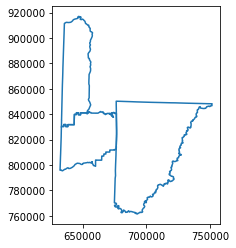

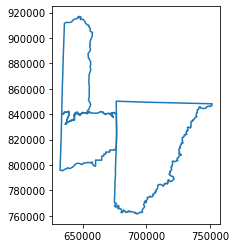

In [167]:
gp.GeoDataFrame(overlap.iloc[6380:6383], crs = tx_vest.crs)['geometry_y'].boundary.plot()
gp.GeoDataFrame(overlap.iloc[6380:6383], crs = tx_vest.crs)['geometry_x'].boundary.plot()

<ipython-input-168-e7057116aa22>:1: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gp.GeoDataFrame(overlap.iloc[6377:6379], crs = tx_vest.crs)['geometry_y'].boundary.plot()
<ipython-input-168-e7057116aa22>:2: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gp.GeoDataFrame(overlap.iloc[6377:6379], crs = tx_vest.crs)['geometry_x'].boundary.plot()


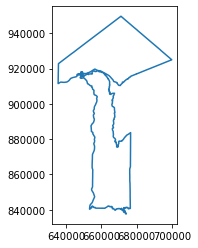

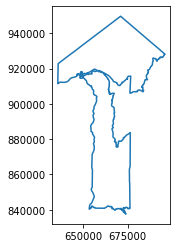

In [168]:
gp.GeoDataFrame(overlap.iloc[6377:6379], crs = tx_vest.crs)['geometry_y'].boundary.plot()
gp.GeoDataFrame(overlap.iloc[6377:6379], crs = tx_vest.crs)['geometry_x'].boundary.plot()

Ok, so these look like substantive differences in the shapefiles